# Techniques to highlight Melanin spots in training data

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, re


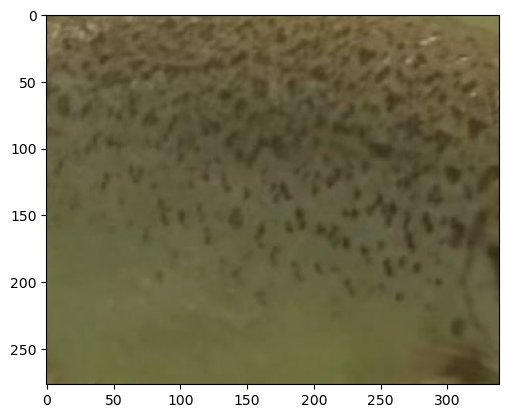

In [12]:
image_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Identifikasjonssett/fish9/thorax/fish9_thorax_GP020101_00005879.jpg"

img_bgr = cv2.imread(image_path)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img)

plt.show()

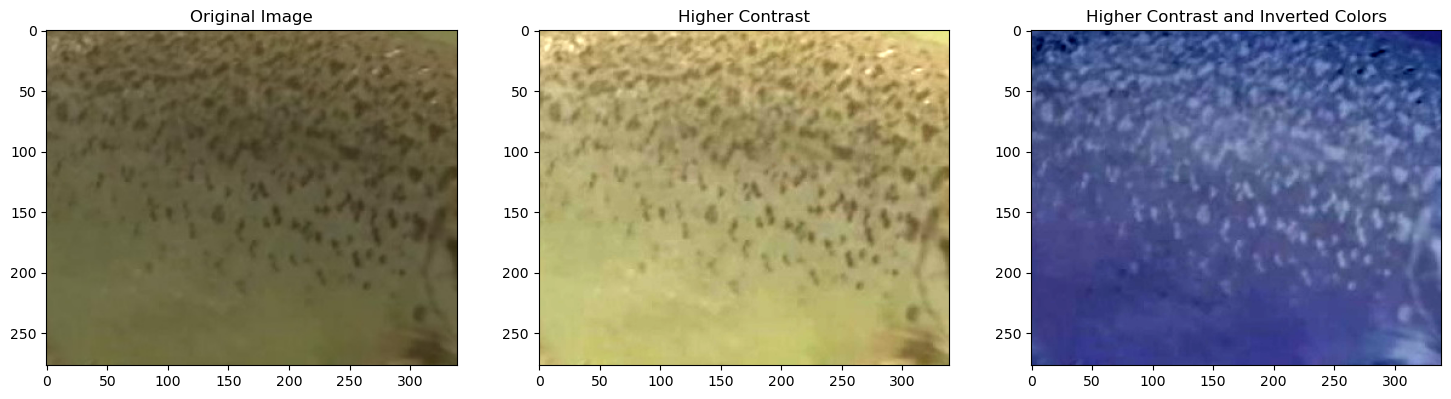

In [19]:
# Increase contrast

matrix1 = np.ones(img.shape) * 1.8

img_highercont = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix1), 0, 255))

plt.figure(figsize=[18,5])
plt.subplot(131)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(img_highercont)
plt.title("Higher Contrast")
plt.subplot(133)
plt.imshow(255-img_highercont)
plt.title("Higher Contrast and Inverted Colors")

plt.show()

# Make training set with Higher Contrast and Inverted Colors

In [34]:
data_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Identifikasjonssett/"

to_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Identifikasjonssett_AP2/"

landmark = "thorax"

images = []

for fish in os.listdir(data_path):
    if not fish.startswith('.'):
        for folder in os.listdir(os.path.join(data_path, fish)):
            if (not folder.startswith('.')) and folder == landmark:
                for file in sorted(os.listdir(os.path.join(data_path, fish, folder))):
                    if file.endswith(('.jpg', '.jpeg', '.png')):
                        img_bgr = cv2.imread(image_path)
                        #img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
                        matrix1 = np.ones(img.shape) * 1.8
                        img_hc = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix1), 0, 255))
                        img_hci = 255 - img_hc
                        dest = os.path.join(to_path, fish, folder)
                        if not os.path.isdir(dest):
                            os.makedirs(dest)
                        cv2.imwrite(dest + "/" + file, img_hci)


# Integrated Gradients

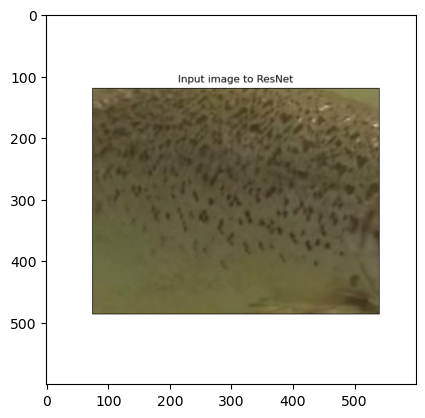

In [4]:
import cv2
import matplotlib.pyplot as plt

img1_path = "/Users/magnuswiik/Documents/masteroppgave figurer/model_interpretability/Figure_1.png"
img2_path = "/Users/magnuswiik/Documents/masteroppgave figurer/model_interpretability/thorax_IG_trained.png"

img_bgr = cv2.imread(img1_path)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img)

plt.show()

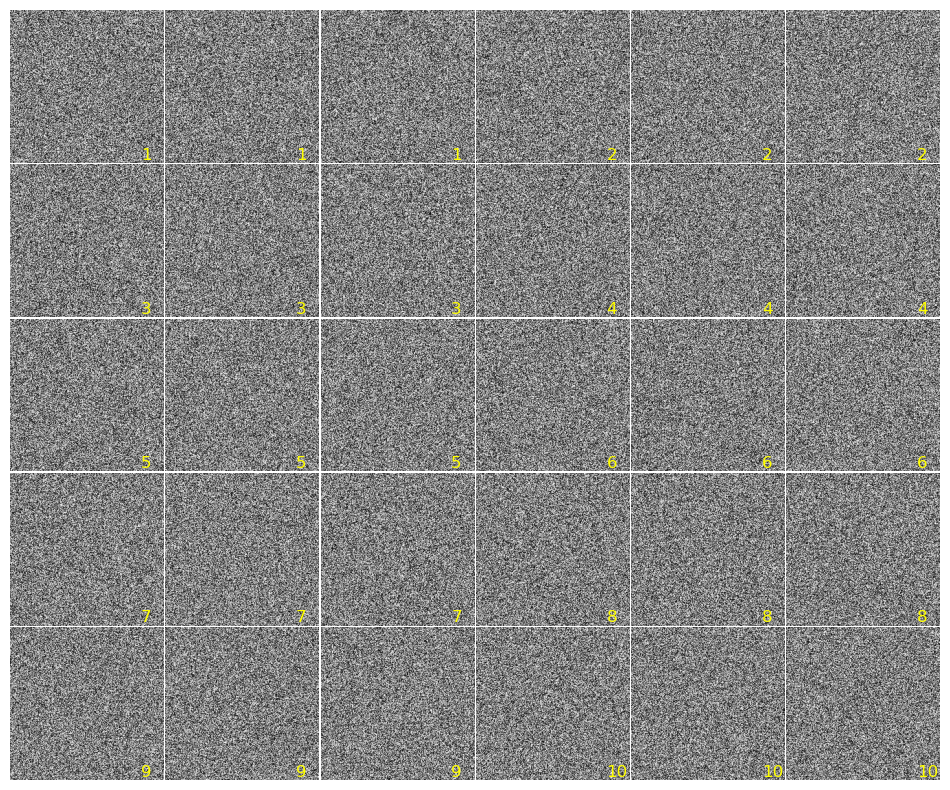

In [79]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 30
image_size = 224

images = np.random.rand(num_images, image_size, image_size)

# Set up the figure and subplots
fig, axs = plt.subplots(5, 6, figsize=(12, 10))

# Flatten the 2D array of subplots for easier indexing
axs = axs.flatten()

def annotate_axes(ax, text, fontsize=12):
    ax.text(0.85, 0.1, text, transform=ax.transAxes,
            ha="left", va="top", fontsize=fontsize, color="yellow")

# Loop through the images and plot them on the subplots
for i in range(num_images):
    ax = axs[i]
    ax.imshow(images[i], cmap='gray', aspect='auto')  # Assuming grayscale images, change cmap if needed
    annotate_axes(ax, str(i//3 + 1))
    ax.axis('off')  # Hide axes

plt.subplots_adjust(wspace=.01, hspace=.01)
# Show the plot
axs[3].margins(10)
axs[4].margins(10)
plt.show()



In [81]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

y_train

array(['setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virgin